###Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


###Load the dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/internship/credit.csv')

###"First few rows of the dataset:"


In [4]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


###DATA PREPROCESSING

###Check for missing value

In [5]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Understanding the dataset

In [7]:
# Display the dimensions of the dataset
print("Shape of the dataset:", df.shape)


Shape of the dataset: (100000, 28)


In [8]:
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [9]:
# Summary statistics
print("Summary statistics:")
print(df.describe())

Summary statistics:
                  ID    Customer_ID          Month            Age  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    80631.500000   25982.666640       4.500000      33.316340   
std     43301.486619   14340.543051       2.291299      10.764812   
min      5634.000000    1006.000000       1.000000      14.000000   
25%     43132.750000   13664.500000       2.750000      24.000000   
50%     80631.500000   25777.000000       4.500000      33.000000   
75%    118130.250000   38385.000000       6.250000      42.000000   
max    155629.000000   50999.000000       8.000000      56.000000   

                SSN  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  1.000000e+05  100000.000000          100000.000000      100000.000000   
mean   5.004617e+08   50505.123449            4197.270835           5.368820   
std    2.908267e+08   38299.422093            3186.432497           2.593314   
min    8.134900e+04    7005.930000    

###Exploratory Data Analysis(EDA)

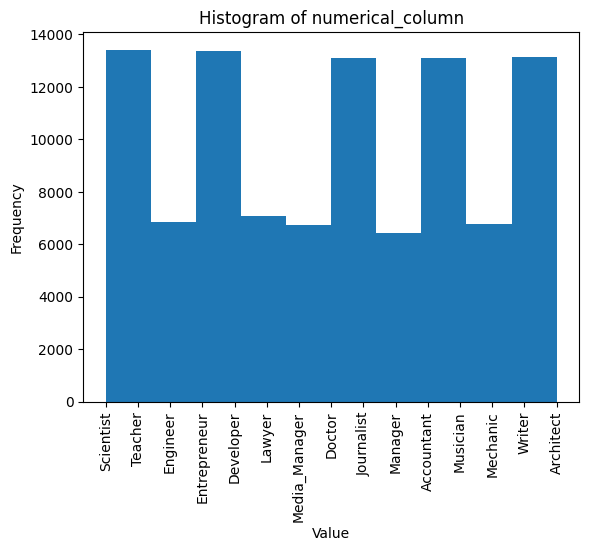

<Figure size 1000x800 with 0 Axes>

In [10]:
# Histogram of Occupation
plt.hist(df['Occupation'])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.title('Histogram of numerical_column')
plt.figure(figsize=(10, 8))
plt.show()

###Categorical Columns

In [11]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')


###Outlier detection

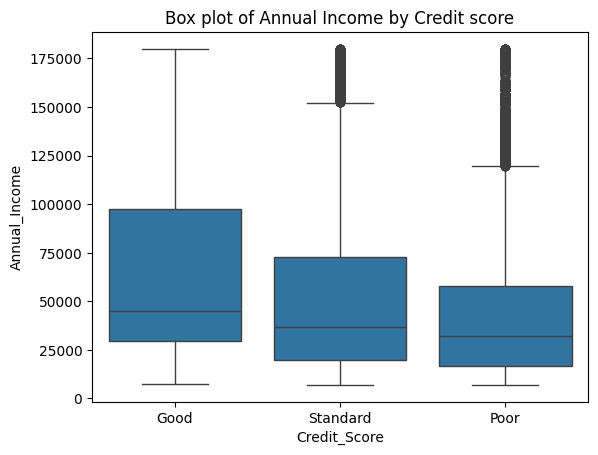

In [12]:
# Box plot of numerical_column by a categorical variable
sns.boxplot(x='Credit_Score', y='Annual_Income', data=df)
plt.title('Box plot of Annual Income by Credit score')
plt.show()

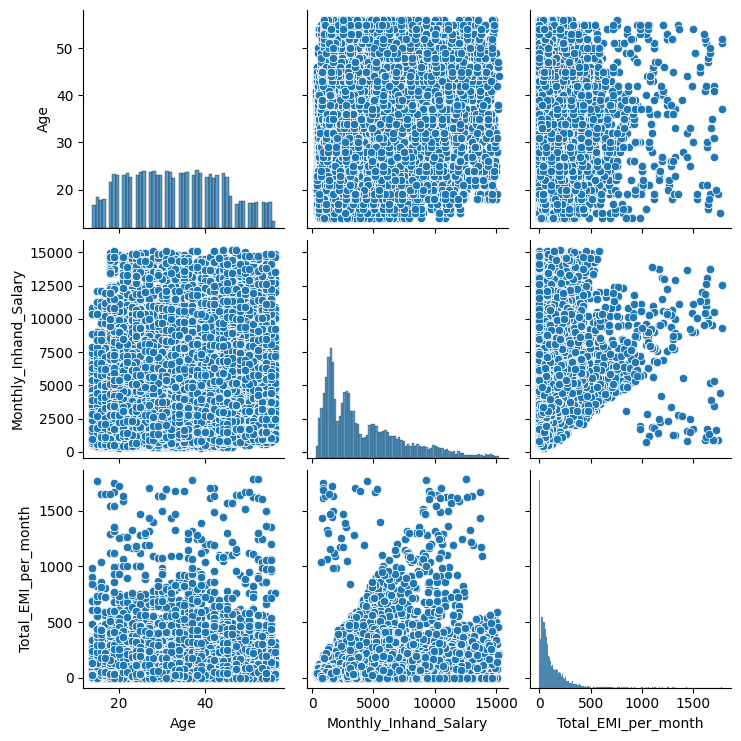

In [13]:
# Pair plot for numerical variables
sns.pairplot(df[['Age', 'Monthly_Inhand_Salary', 'Total_EMI_per_month']])
plt.show()

<ipython-input-14-34c2f36d20ce>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Credit_Score', y='Credit_History_Age', data=df, palette="Set2")


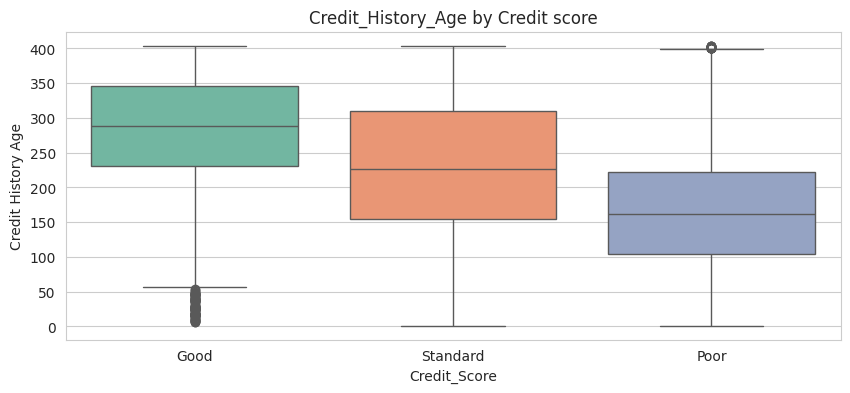

In [14]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Create the box plot
plt.figure(figsize=(10, 4))
sns.boxplot(x='Credit_Score', y='Credit_History_Age', data=df, palette="Set2")
plt.title('Credit_History_Age by Credit score')
plt.xlabel('Credit_Score')
plt.ylabel('Credit History Age')
plt.show()

<ipython-input-15-33f28b569b89>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Occupation', y='Total_EMI_per_month', data=df, palette="Set2")


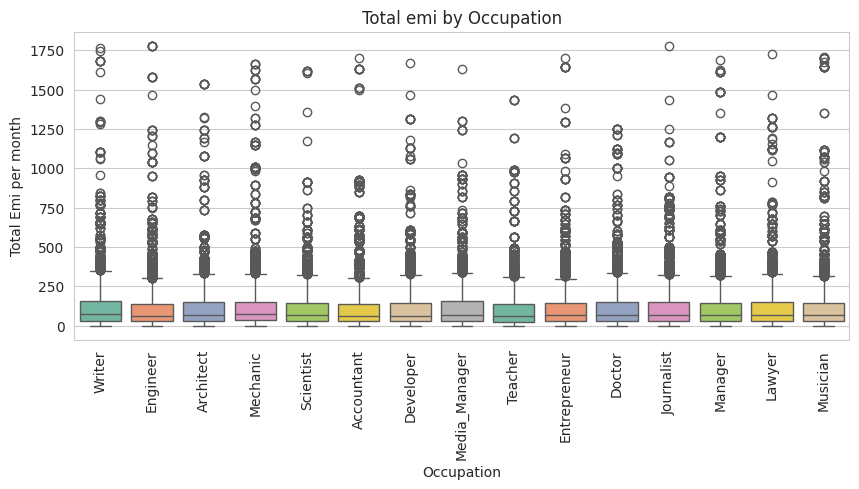

In [15]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Create the box plot
plt.figure(figsize=(10, 4))
sns.boxplot(x='Occupation', y='Total_EMI_per_month', data=df, palette="Set2")
plt.title('Total emi by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Total Emi per month')
plt.xticks([0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14], ['Writer', 'Engineer','Architect','Mechanic','Scientist','Accountant','Developer','Media_Manager','Teacher','Entrepreneur','Doctor','Journalist','Manager','Lawyer','Musician'], rotation = 90)
plt.show()

<ipython-input-16-f57aab9073fc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Credit_Score', y='Interest_Rate', data=df, palette="Set2")


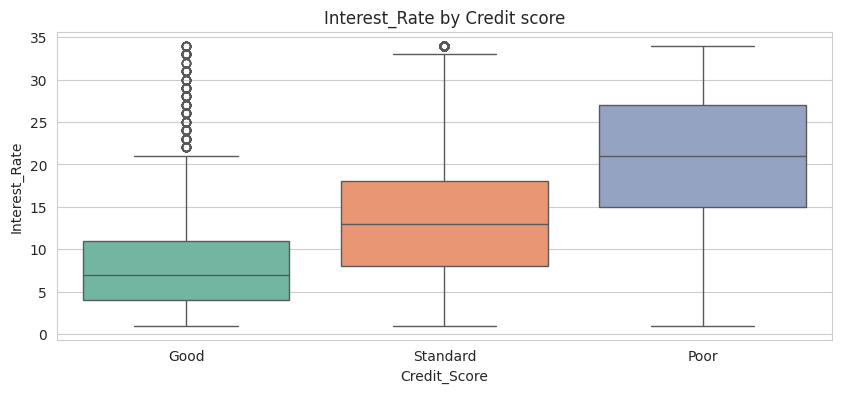

In [16]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Create the box plot
plt.figure(figsize=(10, 4))
sns.boxplot(x='Credit_Score', y='Interest_Rate', data=df, palette="Set2")
plt.title('Interest_Rate by Credit score')
plt.xlabel('Credit_Score')
plt.ylabel('Interest_Rate')
plt.show()

<ipython-input-17-f6b1d8b8fad5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Credit_Score', y='Num_Bank_Accounts', data=df, palette="Set2")


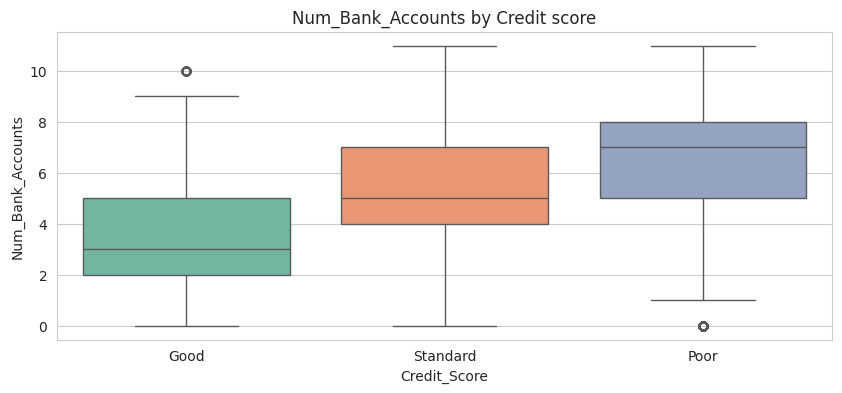

In [17]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Create the box plot
plt.figure(figsize=(10, 4))
sns.boxplot(x='Credit_Score', y='Num_Bank_Accounts', data=df, palette="Set2")
plt.title('Num_Bank_Accounts by Credit score')
plt.xlabel('Credit_Score')
plt.ylabel('Num_Bank_Accounts')
plt.show()

<ipython-input-18-8e0380cfa7b1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Credit_Score', y='Annual_Income', data=df, palette="Set2")


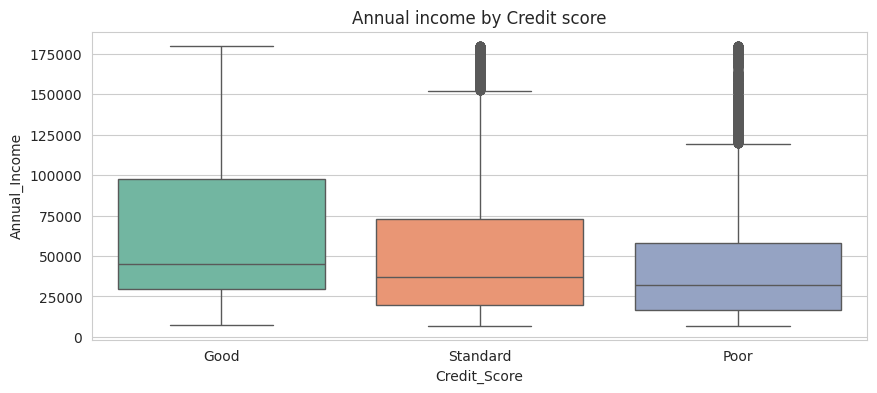

In [18]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Create the box plot
plt.figure(figsize=(10, 4))
sns.boxplot(x='Credit_Score', y='Annual_Income', data=df, palette="Set2")
plt.title('Annual income by Credit score')
plt.xlabel('Credit_Score')
plt.ylabel('Annual_Income')
plt.show()

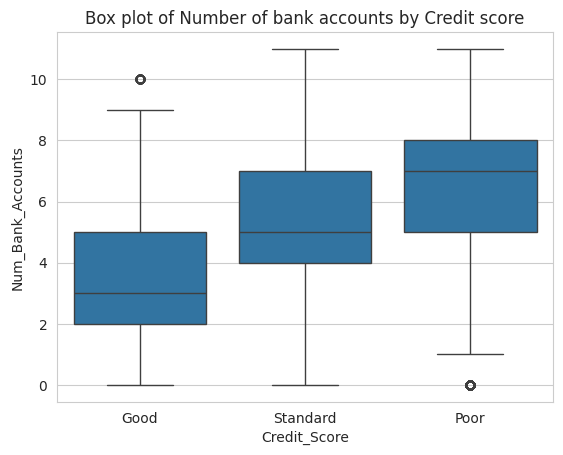

In [19]:
# Box plot of numerical_column by a categorical variable
sns.boxplot(x='Credit_Score', y='Num_Bank_Accounts', data=df)
plt.title('Box plot of Number of bank accounts by Credit score')
plt.show()

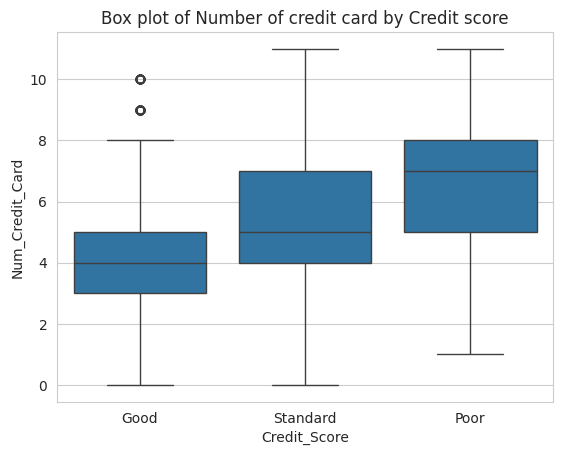

In [20]:
# Box plot of numerical_column by a categorical variable
sns.boxplot(x='Credit_Score', y='Num_Credit_Card', data=df)
plt.title('Box plot of Number of credit card by Credit score')
plt.show()

In [21]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

###Encoding categorical variables

In [22]:
from sklearn.preprocessing import LabelEncoder


In [23]:
label_encoder = LabelEncoder()

In [24]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')


In [25]:
columns_to_encode = ['Occupation', 'Credit_Mix', 'Payment_Behaviour','Payment_of_Min_Amount']


In [26]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [27]:
from sklearn.preprocessing import OneHotEncoder


In [28]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [29]:
one_hot_encoded = encoder.fit_transform(df[columns_to_encode])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [30]:
encoded_column_names = encoder.get_feature_names_out(input_features=columns_to_encode)


In [31]:
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoded_column_names)


In [32]:
df_encoded = pd.concat([df.drop(columns=columns_to_encode), one_hot_df], axis=1)


In [33]:
df_encoded

,ID,Customer_ID,Month,Name,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix_Standard,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
99996,155626,37932,5,Nicks,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
99997,155627,37932,6,Nicks,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
99998,155628,37932,7,Nicks,25.0,78735990.0,39628.99,3359.415833,4.0,6.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [34]:
categorical_column = df_encoded.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_column)

Categorical columns: Index(['Name', 'Type_of_Loan', 'Credit_Score'], dtype='object')


In [35]:
df_encoded.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Credit_Score', 'Occupation_Accountant',
       'Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Credit_Mix_Bad', 'Credit_Mix_Good',
       'Credit_Mix_Standard',
       'Payment_Behaviour_High_spent_Large_value_paymen

In [36]:
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', None)  # Adjust width to fit the screen


In [37]:
df_encoded.head(50)

,ID,Customer_ID,Month,Name,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,809.98,26.822620,265.0,49.574949,21.465380,312.494089,Good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,809.98,31.944960,266.0,49.574949,21.465380,284.629162,Good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,809.98,28.609352,267.0,49.574949,21.465380,331.209863,Good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,809.98,31.377862,268.0,49.574949,21.465380,223.451310,Good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,809.98,24.797347,269.0,49.574949,21.465380,341.489231,Good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,5639,3392,6,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8.0,4.0,9.27,4.0,809.98,27.262259,270.0,49.574949,21.465380,340.479212,Good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,5640,3392,7,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,8.0,11.27,4.0,809.98,22.537593,271.0,49.574949,21.465380,244.565317,Good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7,5641,3392,8,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,6.0,11.27,4.0,809.98,23.933795,272.0,49.574949,21.465380,358.124168,Standard,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,5646,8625,1,Rick Rothackerj,28.0,4075839.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3.0,4.0,5.42,2.0,605.03,24.464031,319.0,18.816215,39.684018,470.690627,Standard,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,5647,8625,2,Rick Rothackerj,28.0,4075839.0,34847.84,3037.

###Feature Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
column_name = 'Credit_Utilization_Ratio'
scaler = StandardScaler()


In [39]:
column_to_scale = df_encoded[[column_name]]

In [40]:
scaler.fit(column_to_scale)


StandardScaler()

In [41]:
scaled_column = scaler.transform(column_to_scale)


In [42]:
df_encoded[column_name] = scaled_column


In [43]:
df_encoded.head()

,ID,Customer_ID,Month,Name,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,809.98,-1.067562,265.0,49.574949,21.46538,312.494089,Good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,809.98,-0.066489,266.0,49.574949,21.46538,284.629162,Good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,809.98,-0.718376,267.0,49.574949,21.46538,331.209863,Good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,809.98,-0.177318,268.0,49.574949,21.46538,223.451310,Good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,809.98,-1.463366,269.0,49.574949,21.46538,341.489231,Good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [44]:
df_encoded.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
       'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score', 'Occupation_Accountant',
       'Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher', 'Occupation_Writer',
       'Credit_Mix_Bad', 'Credit_Mix_Good', 'Credit_Mix_Standard',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_

###From correlation matrix Feature variables are chosen

In [45]:
X = df_encoded[['Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Outstanding_Debt','Credit_Utilization_Ratio','Occupation_Accountant',
       'Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher', 'Occupation_Writer','Credit_Mix_Bad', 'Credit_Mix_Good', 'Credit_Mix_Standard',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments', 'Payment_of_Min_Amount_NM',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes','Credit_Score']]

In [46]:
X.head()

,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Credit_Utilization_Ratio,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Credit_Score
0,3.0,4.0,3.0,4.0,3.0,7.0,11.27,809.98,-1.067562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Good
1,3.0,4.0,3.0,4.0,3.0,4.0,11.27,809.98,-0.066489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Good
2,3.0,4.0,3.0,4.0,3.0,7.0,11.27,809.98,-0.718376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Good
3,3.0,4.0,3.0,4.0,5.0,4.0,6.27,809.98,-0.177318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Good
4,3.0,4.0,3.0,4.0,6.0,4.0,11.27,809.98,-1.463366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Good


In [47]:
column_name = 'Credit_Score'
label_encoder = LabelEncoder()


In [48]:
X[column_name + '_encoded'] = label_encoder.fit_transform(X[column_name])

<ipython-input-48-c109fd78d271>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column_name + '_encoded'] = label_encoder.fit_transform(X[column_name])


In [49]:
X.head()

,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Credit_Utilization_Ratio,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Credit_Score,Credit_Score_encoded
0,3.0,4.0,3.0,4.0,3.0,7.0,11.27,809.98,-1.067562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Good,0
1,3.0,4.0,3.0,4.0,3.0,4.0,11.27,809.98,-0.066489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Good,0
2,3.0,4.0,3.0,4.0,3.0,7.0,11.27,809.98,-0.718376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Good,0
3,3.0,4.0,3.0,4.0,5.0,4.0,6.27,809.98,-0.177318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Good,0
4,3.0,4.0,3.0,4.0,6.0,4.0,11.27,809.98,-1.463366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Good,0


In [50]:
X.columns

Index(['Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Occupation_Accountant', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher', 'Occupation_Writer',
       'Credit_Mix_Bad', 'Credit_Mix_Good', 'Credit_Mix_Standard',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Sm

In [51]:
X = X.drop(columns=['Credit_Score'])

###Correlation between variables

In [52]:
X.corr()

,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Credit_Utilization_Ratio,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Credit_Score_encoded
Num_Bank_Accounts,1.000000,0.442694,0.584302,0.472483,0.560193,0.601842,0.333794,0.507063,-0.071783,-0.005617,-0.004356,-0.002425,0.001799,0.001791,0.001007,0.002268,-0.014195,0.002637,0.006273,-0.012744,0.004731,0.007406,-0.002005,0.014422,0.559449,-0.635419,0.108579,-0.073443,-0.028626,-0.008328,0.000132,-0.005927,0.093243,-0.000219,-0.526976,0.505549,0.177389
Num_Credit_Card,0.442694,1.000000,0.497912,0.417960,0.479762,0.423300,0.255495,0.490376,-0.055249,0.003195,-0.010649,0.011196,-0.005458,0.000279,0.005143,0.005844,-0.006900,-0.007374,-0.008825,0.001902,-0.004210,-0.003210,0.013222,0.006138,0.523402,-0.383955,-0.092732,-0.058516,-0.020244,0.000121,-0.002742,-0.007481,0.071312,-0.000678,-0.374884,0.359982,0.113333
Interest_Rate,0.584302,0.497912,1.000000,0.559156,0.589185,0.571457,0.370156,0.629414,-0.075700,0.001075,-0.016800,0.005010,-0.001287,0.005447,-0.000704,-0.001767,-0.000818,0.009110,0.007440,-0.007930,0.002384,-0.006844,-0.000028,0.006165,0.634378,-0.613014,0.023890,-0.083595,-0.030050,-0.002622,-0.004736,-0.004511,0.100626,0.005122,-0.573132,0.546340,0.121088
Num_of_Loan,0.472483,0.417960,0.559156,1.000000,0.501599,0.473919,0.374602,0.638713,-0.100469,-0.000550,-0.012262,0.008017,0.017888,0.001395,0.011837,-0.014073,-0.006071,0.000875,0.008282,-0.007526,-0.008998,0.006883,-0.005428,-0.000257,0.646091,-0.418013,-0.166106,-0.067600,-0.032608,0.000688,-0.008182,-0.004354,0.090218,-0.001148,-0.467413,0.449029,0.064064
Delay_from_due_date,0.560193,0.479762,0.589185,0.501599,1.000000,0.541627,0.296571,0.572206,-0.063823,0.001231,-0.011469,0.003084,-0.004444,0.011718,0.001089,-0.014452,-0.003932,0.003525,0.003452,-0.002310,-0.002136,-0.001279,0.013431,0.002451,0.656562,-0.491152,-0.107542,-0.068297,-0.025286,-0.003763,0.000666,-0.008780,0.084862,0.001267,-0.459136,0.439520,0.097286
Num_of_Delayed_Payment,0.601842,0.423300,0.571457,0.473919,0.541627,1.000000,0.329311,0.504019,-0.073774,0.006210,-0.002542,0.007395,0.004119,-0.002177,-0.002887,0.001553,-0.006581,0.006209,0.003600,-0.008416,-0.007730,0.010781,-0.011193,0.001815,0.590301,-0.660909,0.105750,-0.074793,-0.028964,-0.001287,-0.003147,-0.003245,0.089745,0.001353,-0.537593,0.514709,0.203116
Changed_Credit_Limit,0.333794,0.255495,0.370156,0.374602,0.296571,0.329311,1.000000,0.463684,-0.047903,0.015653,-0.012420,0.009203,0.000421,0.008966,-0.015810,-0.003019,-0.002657,-0.001116,-0.002405,0.003601,-0.007239,-0.007813,0.007685,0.006922,0.298102,-0.413341,0.126860,-0.044304,-0.015765,0.001868,-0.000662,-0.009622,0.055216,-0.000194,-0.460676,0.441947,0.190080
Outstanding_Debt,0.507063,0.490376,0.629414,0.638713,0.572206,0.504019,0.463684,1.000000,-0.071165,0.002719,-0.019449,0.003349,0.005951,0.006024,-0.006737,0.005190,-0.017927,0.008145,0.014039,-0.006448,-0.004791,0.002486,0.004102,0.004089,0.760932,-0.391675,-0.288522,-0.075942,-0.030874,-0.000707,-0.007113,-0.006355,0.097048,0.001497,-0.444383,0.425221,0.037153
Credit_Utilization_Ratio,-0.071783,-0.055249,-0.075700,-0.100469,-0.063823,-0.073774,-0.047903,-0.071165,1.000000,-0.000041,0.003750,-0.001188,-0.0029

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

###Heat map

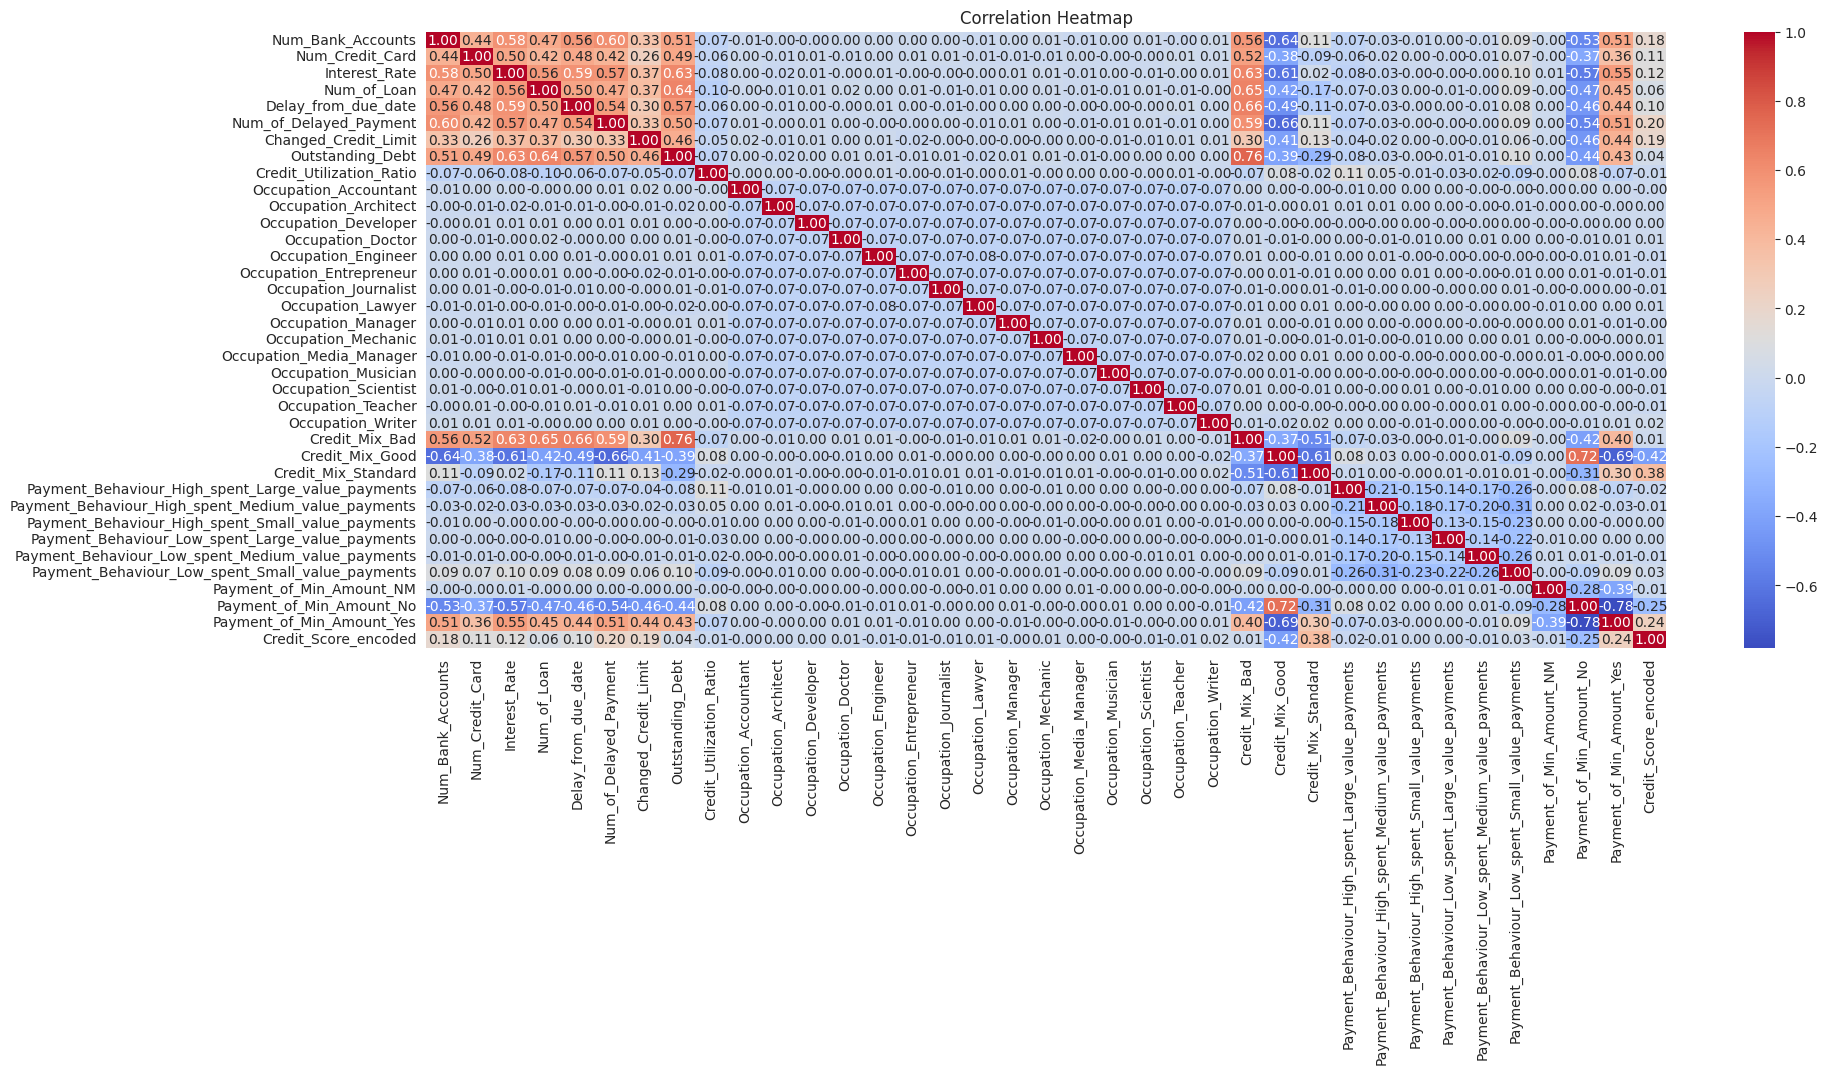

In [54]:
plt.figure(figsize=(20, 8))  # Set the size of the plot
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")  # Create the heatmap, annot=True to display correlation values, cmap specifies the color map, fmt=".2f" to display values with 2 decimal places
plt.title('Correlation Heatmap')  # Set the title of the plot
plt.show()

In [55]:
df_encoded.head()

,ID,Customer_ID,Month,Name,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,809.98,-1.067562,265.0,49.574949,21.46538,312.494089,Good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,809.98,-0.066489,266.0,49.574949,21.46538,284.629162,Good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,809.98,-0.718376,267.0,49.574949,21.46538,331.209863,Good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,809.98,-0.177318,268.0,49.574949,21.46538,223.451310,Good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,809.98,-1.463366,269.0,49.574949,21.46538,341.489231,Good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [56]:
X.shape

(100000, 37)

In [57]:
df_encoded.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
       'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score', 'Occupation_Accountant',
       'Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher', 'Occupation_Writer',
       'Credit_Mix_Bad', 'Credit_Mix_Good', 'Credit_Mix_Standard',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_

###Feature Selection

In [58]:
x = df_encoded[['Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Outstanding_Debt','Credit_Utilization_Ratio','Occupation_Accountant','Occupation_Doctor','Occupation_Entrepreneur','Occupation_Lawyer','Occupation_Mechanic','Occupation_Writer','Credit_Mix_Standard','Payment_Behaviour_Low_spent_Small_value_payments','Payment_of_Min_Amount_NM','Payment_of_Min_Amount_Yes']]

In [59]:
x.head()

,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Credit_Utilization_Ratio,Occupation_Accountant,Occupation_Doctor,Occupation_Entrepreneur,Occupation_Lawyer,Occupation_Mechanic,Occupation_Writer,Credit_Mix_Standard,Payment_Behaviour_Low_spent_Small_value_payments,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_Yes
0,3.0,4.0,3.0,4.0,3.0,7.0,11.27,809.98,-1.067562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,4.0,3.0,4.0,3.0,4.0,11.27,809.98,-0.066489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,4.0,3.0,4.0,3.0,7.0,11.27,809.98,-0.718376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,4.0,3.0,4.0,5.0,4.0,6.27,809.98,-0.177318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3.0,4.0,3.0,4.0,6.0,4.0,11.27,809.98,-1.463366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
y =df_encoded['Credit_Score']

In [61]:
x.shape

(100000, 19)

In [62]:
y.shape

(100000,)

In [63]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [64]:
# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

###Model Selection

###Model 1 : RandomForest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
model_1 = RandomForestClassifier(n_estimators=100, random_state=42)

In [67]:
model_1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [68]:
y_pred = model_1.predict(X_test)


In [69]:
from sklearn.metrics import accuracy_score

In [70]:
from sklearn.metrics import classification_report


In [71]:
accuracy_1 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_1)

Accuracy: 0.7799


In [72]:
from sklearn.metrics import confusion_matrix


In [73]:
cm = confusion_matrix(y_test, y_pred)


In [74]:
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[2469   23 1035]
 [  81 4643 1150]
 [ 831 1282 8486]]


In [75]:
report = classification_report(y_test, y_pred)

In [76]:
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

        Good       0.73      0.70      0.71      3527
        Poor       0.78      0.79      0.79      5874
    Standard       0.80      0.80      0.80     10599

    accuracy                           0.78     20000
   macro avg       0.77      0.76      0.77     20000
weighted avg       0.78      0.78      0.78     20000



###Model 2 : Decision Tree Classifier

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
model_2 = DecisionTreeClassifier(random_state=42)

In [79]:
model_2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [80]:
y_pred = model_2.predict(X_test)

In [81]:
accuracy_2 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_2)

Accuracy: 0.70535


In [82]:
cm_2 = confusion_matrix(y_test, y_pred)


In [83]:
print("Confusion Matrix:")
print(cm_2)

Confusion Matrix:
[[2161  130 1236]
 [ 136 4139 1599]
 [1169 1623 7807]]


In [84]:
report_2 = classification_report(y_test, y_pred)

In [85]:
print("Classification Report:")
print(report_2)

Classification Report:
              precision    recall  f1-score   support

        Good       0.62      0.61      0.62      3527
        Poor       0.70      0.70      0.70      5874
    Standard       0.73      0.74      0.74     10599

    accuracy                           0.71     20000
   macro avg       0.69      0.68      0.69     20000
weighted avg       0.71      0.71      0.71     20000



###Model 3 : Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
model_3 = LogisticRegression(random_state=42)

In [88]:
model_3.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [89]:
y_pred = model_3.predict(X_test)

In [90]:
accuracy_3 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_3)

Accuracy: 0.5731


In [91]:
cm_3 = confusion_matrix(y_test, y_pred)


In [92]:
print("Confusion Matrix:")
print(cm_3)

Confusion Matrix:
[[  39  560 2928]
 [   5 2702 3167]
 [  43 1835 8721]]


In [93]:
report_3 = classification_report(y_test, y_pred)

In [94]:
print("Classification Report:")
print(report_3)

Classification Report:
              precision    recall  f1-score   support

        Good       0.45      0.01      0.02      3527
        Poor       0.53      0.46      0.49      5874
    Standard       0.59      0.82      0.69     10599

    accuracy                           0.57     20000
   macro avg       0.52      0.43      0.40     20000
weighted avg       0.55      0.57      0.51     20000



###Model 4 : KNN

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
model_4 = KNeighborsClassifier(n_neighbors=3)

In [97]:
model_4.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [98]:
y_pred = model_4.predict(X_test)

In [99]:
accuracy_4 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_4)

Accuracy: 0.77645


In [100]:
cm_4 = confusion_matrix(y_test, y_pred)


In [101]:
print("Confusion Matrix:")
print(cm_4)

Confusion Matrix:
[[2613   12  902]
 [  64 4701 1109]
 [1022 1362 8215]]


In [102]:
report_4 = classification_report(y_test, y_pred)

In [103]:
print("Classification Report:")
print(report_4)

Classification Report:
              precision    recall  f1-score   support

        Good       0.71      0.74      0.72      3527
        Poor       0.77      0.80      0.79      5874
    Standard       0.80      0.78      0.79     10599

    accuracy                           0.78     20000
   macro avg       0.76      0.77      0.77     20000
weighted avg       0.78      0.78      0.78     20000



###Model 5 : SVM


In [104]:
from sklearn.svm import SVC

In [105]:
model_5 = SVC()


In [106]:
model_5.fit(X_train, y_train)

SVC()

In [107]:
y_pred = model_5.predict(X_test)

In [108]:
accuracy_5 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_5)

Accuracy: 0.6034


In [109]:
cm_5 = confusion_matrix(y_test, y_pred)


In [110]:
print("Confusion Matrix:")
print(cm_5)

Confusion Matrix:
[[   0   45 3482]
 [   0 2769 3105]
 [   0 1300 9299]]


In [111]:
report_5 = classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [112]:
print("Classification Report:")
print(report_5)

Classification Report:
              precision    recall  f1-score   support

        Good       0.00      0.00      0.00      3527
        Poor       0.67      0.47      0.55      5874
    Standard       0.59      0.88      0.70     10599

    accuracy                           0.60     20000
   macro avg       0.42      0.45      0.42     20000
weighted avg       0.51      0.60      0.53     20000



###Evaluating model

In [113]:
import warnings


In [114]:
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "SVC" : SVC(),
    "Logistic Regression": LogisticRegression(solver='liblinear', max_iter=1000),
    "Decision Tree" : DecisionTreeClassifier(),
    "KNearest Neighbor" : KNeighborsClassifier(n_neighbors=3)
}

In [115]:
results_df = pd.DataFrame(columns=['Classifier', 'Accuracy'])

In [116]:
for clf_name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Append results to DataFrame
    results_df = pd.concat([results_df, pd.DataFrame({'Classifier': [clf_name], 'Accuracy': [accuracy]})], ignore_index=True)


In [117]:
results_df

,Classifier,Accuracy
0,Random Forest,0.78005
1,SVC,0.60340
2,Logistic Regression,0.64025
3,Decision Tree,0.70450
4,KNearest Neighbor,0.77645


###Model Comparison

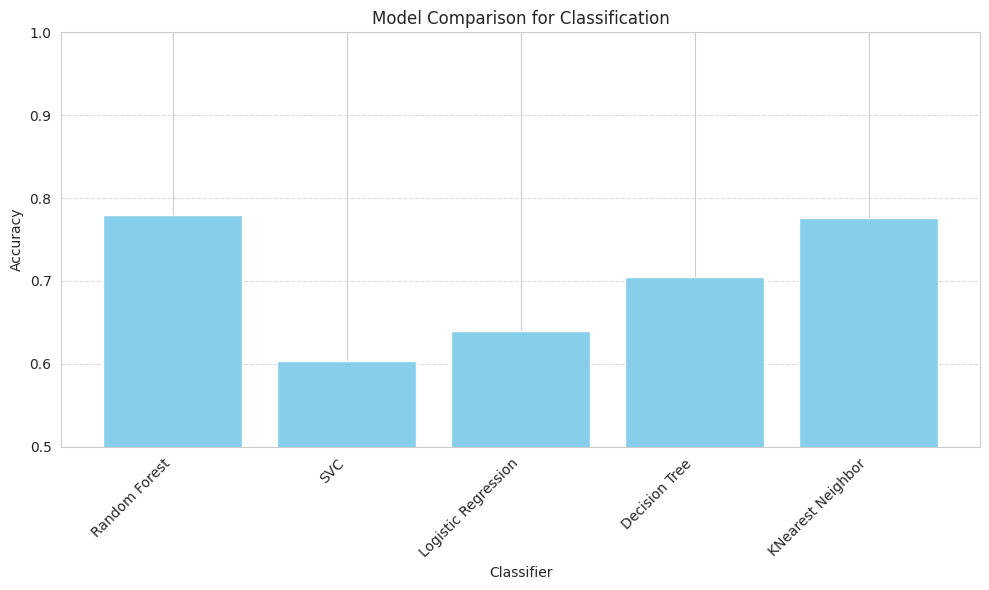

In [118]:
plt.figure(figsize=(10, 6))
plt.bar(results_df['Classifier'], results_df['Accuracy'], color='skyblue')
plt.title('Model Comparison for Classification')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.0)  # Setting y-axis limits for better visualization
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###Random forest is slightly more accurate than KNearest Neighbor

###Hyperparameter Turning

###Random Search

In [163]:
x_1 = x.iloc[:1000]  # Select first 10 rows


In [164]:
y_1 = y.iloc[:1000]

In [121]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

In [122]:
classifier = RandomForestClassifier()

In [123]:
param_dist = {
    'n_estimators': randint(10, 100),
    'max_depth': randint(2, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

In [124]:
random_search = RandomizedSearchCV(classifier, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, n_jobs=-1)


In [125]:
random_search.fit(x_1, y_1)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c7181178190>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c718117bd60>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c71812bcb80>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c71812bd330>},
                   verbose=1)

In [126]:
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'bootstrap': True, 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 7, 'n_estimators': 52}


In [127]:
print("Best Cross-validation Score:", random_search.best_score_)


Best Cross-validation Score: 0.6795


In [128]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint

In [129]:
param_dist = {
    'n_neighbors': randint(1, 20),  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2],  # Power parameter for Minkowski distance
}

In [130]:
knn = KNeighborsClassifier()

In [131]:
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)


In [132]:
random_search.fit(x_1, y_1)


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c71812f1a20>,
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=42)

In [133]:
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'n_neighbors': 12, 'p': 1, 'weights': 'uniform'}


In [134]:
print("Best Score:", random_search.best_score_)


Best Score: 0.5735


In [135]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint


In [136]:
classifier = DecisionTreeClassifier()


In [137]:
param_dist = {
    'max_depth': randint(1, 10),  # Maximum depth of the tree
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 10),  # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy']  # Splitting criterion
}

In [138]:
random_search = RandomizedSearchCV(classifier, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)


In [139]:
random_search.fit(x_1, y_1)


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c71812f1360>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c7181334f40>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c7181335a50>},
                   random_state=42)

In [140]:
print("Best Hyperparameters:", random_search.best_params_)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 7, 'min_samples_split': 12}


In [141]:
print("Best Cross-Validation Score:", random_search.best_score_)


Best Cross-Validation Score: 0.6668000000000001


###Cross-Validation

###K-Fold Cross-Validation

In [142]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [143]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [144]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

In [145]:
cv_scores = cross_val_score(classifier, X_train, y_train, cv=k_fold, scoring='accuracy')


In [146]:
print("Cross-validation scores:", cv_scores)


Cross-validation scores: [0.78132813 0.78453125 0.77875    0.77601562 0.76765625]


In [147]:
classifier = DecisionTreeClassifier(random_state=42)

In [148]:
cv_scores = cross_val_score(classifier, X_train, y_train, cv=k_fold, scoring='accuracy')


In [149]:
print("Cross-validation scores:", cv_scores)


Cross-validation scores: [0.70609375 0.69609375 0.698125   0.69632812 0.68953125]


In [150]:
classifier = LogisticRegression(random_state=42)

In [151]:
cv_scores = cross_val_score(classifier, X_train, y_train, cv=k_fold, scoring='accuracy')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [152]:
print("Cross-validation scores:", cv_scores)


Cross-validation scores: [0.581875   0.575625   0.56867188 0.58210938 0.5834375 ]


In [153]:
classifier = KNeighborsClassifier(n_neighbors=3)

In [154]:
cv_scores = cross_val_score(classifier, X_train, y_train, cv=k_fold, scoring='accuracy')


In [155]:
print("Cross-validation scores:", cv_scores)


Cross-validation scores: [0.77257813 0.77085938 0.77742188 0.770625   0.76335937]


In [156]:
classifier = SVC()

In [157]:
cv_scores = cross_val_score(classifier, X_train, y_train, cv=k_fold, scoring='accuracy')


In [158]:
print("Cross-validation scores:", cv_scores)


Cross-validation scores: [0.60523437 0.605      0.601875   0.60882813 0.6075    ]


###Leave-One-Out Cross-Validation (LOOCV)



In [159]:
from sklearn.model_selection import LeaveOneOut

In [160]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)


In [161]:
loocv = LeaveOneOut()


In [165]:
cv_scores = cross_val_score(classifier, x_1, y_1, cv=loocv, scoring='accuracy')


In [166]:
print("Cross-validation scores:", cv_scores)


Cross-validation scores: [1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1.
 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1

In [167]:
print("Average accuracy:", cv_scores.mean())


Average accuracy: 0.776


In [168]:
classifier = KNeighborsClassifier(n_neighbors=3)


In [169]:
loocv = LeaveOneOut()

In [170]:
cv_scores = cross_val_score(classifier, x_1, y_1, cv=loocv, scoring='accuracy')


In [171]:
print("Cross-validation scores:", cv_scores)


Cross-validation scores: [1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1

In [172]:
print("Average accuracy:", cv_scores.mean())


Average accuracy: 0.787


###Stratified k-Fold Cross-Validation

In [173]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [174]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)


In [175]:
k = 5


In [176]:
stratified_kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)


In [177]:
cv_scores = cross_val_score(classifier, x_1, y_1, cv=stratified_kfold, scoring='accuracy')


In [178]:
print("Cross-Validation Scores:", cv_scores)


Cross-Validation Scores: [0.74  0.785 0.81  0.795 0.74 ]


In [180]:
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_scores.std())

Mean CV Accuracy: 0.774
Standard Deviation of CV Accuracy: 0.028879058156387326


In [181]:
classifier = KNeighborsClassifier(n_neighbors=3)


In [182]:
cv_scores = cross_val_score(classifier, x_1, y_1, cv=stratified_kfold, scoring='accuracy')


In [183]:
print("Cross-Validation Scores:", cv_scores)


Cross-Validation Scores: [0.76  0.795 0.805 0.8   0.77 ]


In [184]:
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_scores.std())

Mean CV Accuracy: 0.786
Standard Deviation of CV Accuracy: 0.017720045146669368
